In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df = pd.read_csv("/content/drive/MyDrive/Research Group/Research with Prodeep and Arif vai/Dataset_Siamak_Yousefi_PLOS_One_2018.csv");

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(3162, 448)

In [ ]:
df=df.drop([
'idEye',
'BFS_Ecc',
'BFS_Ecc.1',
'Apex.1',
'Thinnest.4mm.',
'LocationX.2',
'LocationY.2',
'CSI_T.1',
'SD_T.4mm..1',
'CV_T.4mm..1',
'Apex.2',
'Thinnest.4mm..1',
'LocationX.3',
'LocationY.3',
'CSI_T.2',
'SD_T.4mm..2',
'CV_T.4mm..2',
'RMS_E.4mm..2',
'SR_E.4mm..2',
'En.Anterior.',
'ESI.Anterior.'],
axis='columns')

In [ ]:
df.shape

(3162, 427)

In [ ]:
# Label Encoding
for x in range(3162):
  y=df['ESI.Posterior.'][x]
  if y>=0 and y<5:
    df['ESI.Posterior.'][x]=0
  elif y>=5 and y<30:
    df['ESI.Posterior.'][x]=1
  else: df['ESI.Posterior.'][x]=2

<ipython-input-242-dd65c58b21e7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ESI.Posterior.'][x]=1
<ipython-input-242-dd65c58b21e7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ESI.Posterior.'][x]=0
<ipython-input-242-dd65c58b21e7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else: df['ESI.Posterior.'][x]=2


In [ ]:
df['ESI.Posterior.']

0       1
1       0
2       0
3       1
4       1
       ..
3157    1
3158    1
3159    0
3160    0
3161    0
Name: ESI.Posterior., Length: 3162, dtype: int64

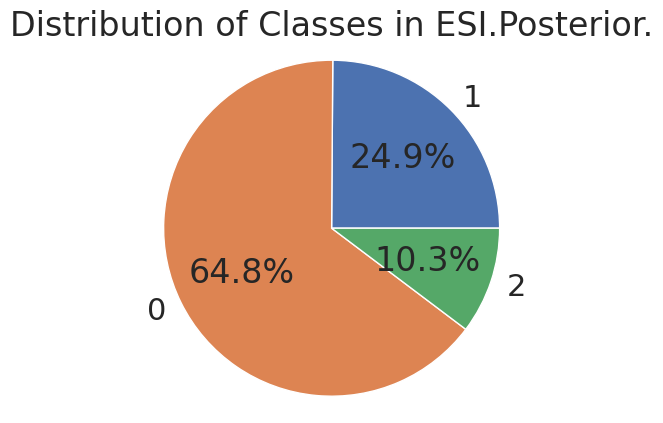

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# select the column with 3 classes
column_of_interest = 'ESI.Posterior.'
classes = df[column_of_interest].unique()

# count the number of occurrences of each class
class_counts = [len(df[df[column_of_interest] == c]) for c in classes]

# plot the pie chart
plt.pie(class_counts, labels=classes, autopct='%1.1f%%')
plt.title('Distribution of Classes in {}'.format(column_of_interest))
plt.axis('equal')


plt.show()


In [ ]:
X = df.iloc[:,0:425]  #independent columns
y = df.iloc[:,-1]

In [ ]:
X

,Unnamed: 0,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,ACCP,...,SA.C40..4,S35.coma.like..4,S46.sph..like..4,HOAs.S3456..4,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5
0,9,44.53,21,39.22,111,41.87,5.32,86.7,0.91,41.67,...,0.067,0.988,0.374,1.057,3.131,97,-0.722,3.350,1.053,3.512
1,10,43.84,39,42.46,129,43.15,1.38,88.2,0.65,43.14,...,0.023,0.209,0.190,0.283,0.575,97,0.085,0.921,0.290,0.966
2,39,44.81,66,44.41,156,44.61,0.40,83.0,0.48,44.70,...,-0.098,0.196,0.412,0.456,0.177,9,0.268,0.263,0.640,0.692
3,55,44.00,51,42.31,141,43.15,1.69,97.3,0.60,43.16,...,-0.143,1.111,0.571,1.250,0.492,275,-0.281,3.396,1.419,3.680
4,56,45.42,26,45.20,116,45.31,0.22,93.3,0.69,45.29,...,0.111,0.329,0.205,0.387,0.571,85,0.109,0.691,0.181,0.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,12238,46.60,86,45.79,176,46.19,0.81,97.0,0.75,46.18,...,0.184,0.175,0.231,0.290,0.384,339,0.164,0.583,0.259,0.638
3158,12239,44.05,82,43.90,172,43.97,0.15,96.4,0.63,44.00,...,0.054,0.148,0.141,0.204,0.156,217,0.242,0.388,0.387,0.548
3159,12240,44.12,3,43.47,93,43.80,0.66,96.6,0.60,43.82,...,0.132,0.142,0.098,0.173,0.179,337,0.348,0.313,0.384,0.495
3160,12241,46.59,90,44.74,0,45.66,1.86,96.1,0.74,45.77,...,-0.215,0.463,0.607,0.763,0.609,113,-0.124,1.092,0.842,1.379


In [ ]:
y

0       1
1       0
2       0
3       1
4       1
       ..
3157    1
3158    1
3159    0
3160    0
3161    0
Name: ESI.Posterior., Length: 3162, dtype: int64

In [ ]:
#apply SelectKBest class to extract top 10 best features
# bestfeatures = SelectKBest(score_func=chi2, k=50)
# fit = bestfeatures.fit_transform(X,y)
# Feature Selection
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [ ]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.00078176 0.00090646 0.0010466  0.00056901 0.00100612 0.00061827
 0.00069518 0.00075535 0.00054319 0.00059243 0.00179883 0.00086866
 0.00054754 0.00111347 0.00074471 0.00087165 0.00074521 0.00057669
 0.00286235 0.00111592 0.00212038 0.00065162 0.00223446 0.00203305
 0.00063727 0.00155417 0.00075955 0.00080684 0.00074157 0.00087513
 0.00055758 0.00062013 0.00075097 0.00113006 0.0006211  0.00076742
 0.000849   0.00098436 0.00066234 0.00097499 0.0029006  0.00064326
 0.00091176 0.00063843 0.00070071 0.00081878 0.00084702 0.00072583
 0.00063222 0.00055858 0.00108185 0.00125016 0.00094857 0.00049906
 0.00132789 0.00055019 0.00055432 0.00086718 0.00083028 0.00060413
 0.00065047 0.00327316 0.00242891 0.00071601 0.01869224 0.00067683
 0.00404116 0.00148428 0.00217564 0.00079486 0.01891434 0.000654
 0.00460199 0.00046025 0.00072088 0.00090411 0.00101274 0.00051936
 0.0005026  0.00071198 0.00059471 0.00071633 0.0005434  0.00066821
 0.0029485  0.00074868 0.0008797  0.00076553 0.00067227 0.001000

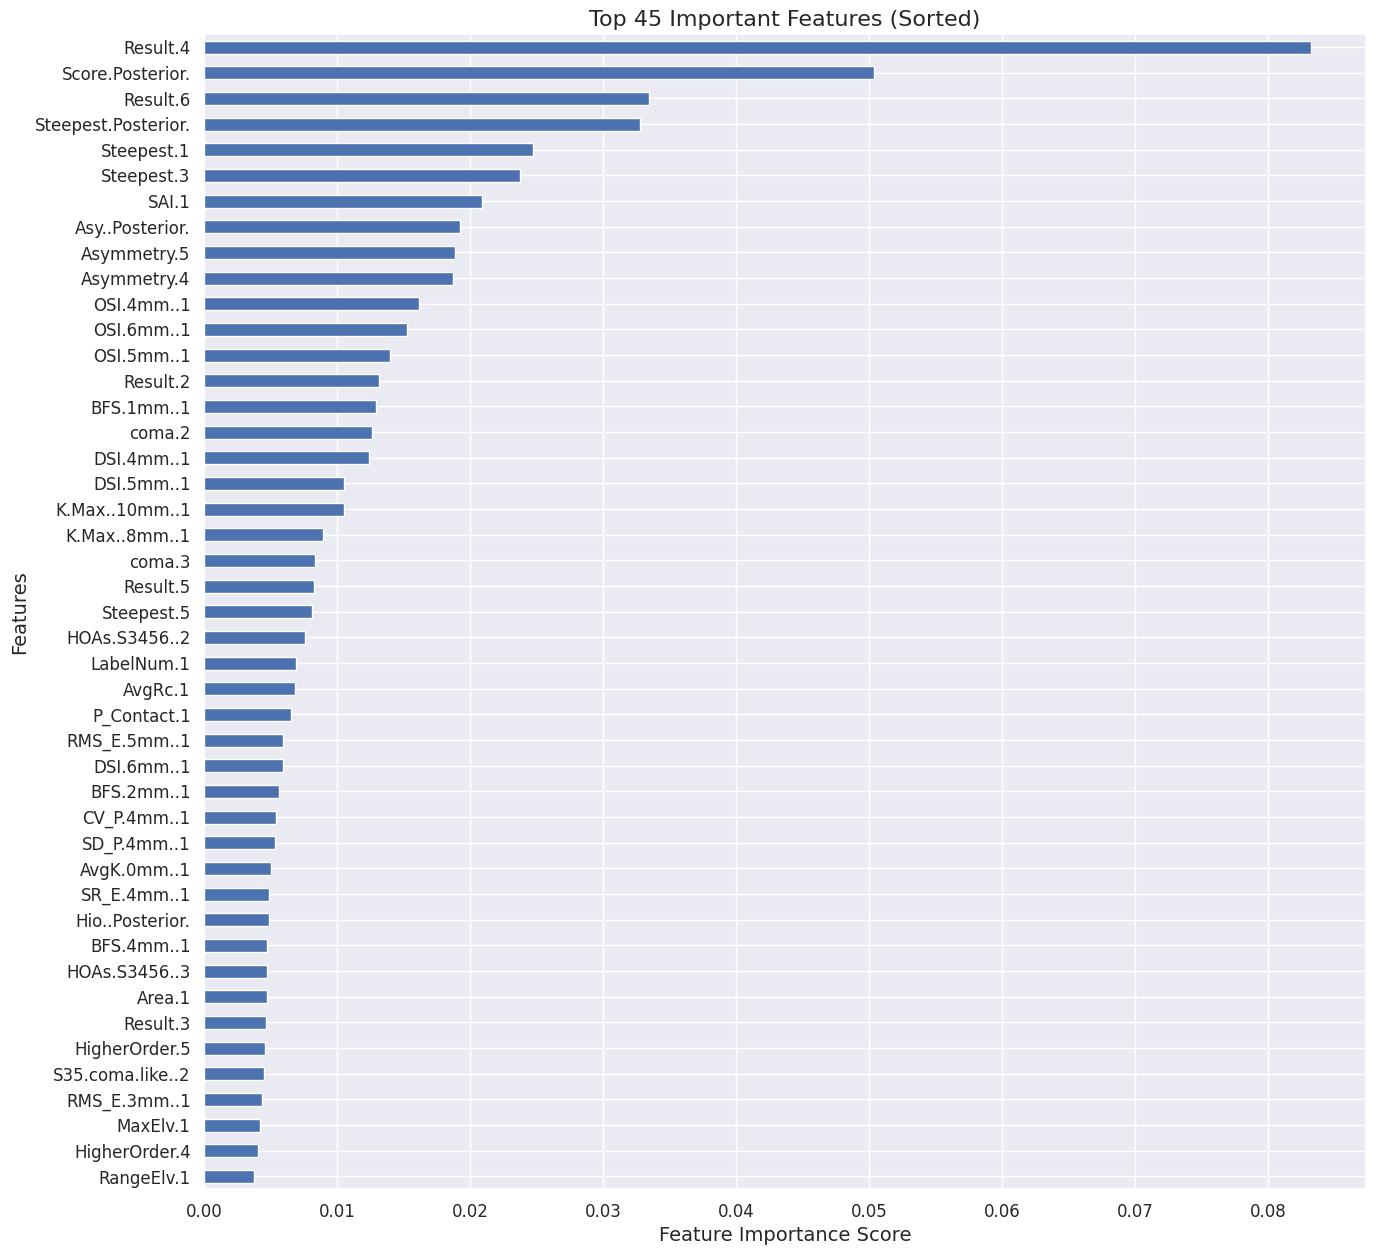

In [ ]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
top_n = 45
sorted_feat_importances = feat_importances.nlargest(top_n).sort_values(ascending=True)

plt.figure(figsize=(15, 15))
sorted_feat_importances.plot(kind='barh')
plt.xlabel('Feature Importance Score', fontsize=14)  # Adjust the font size
plt.ylabel('Features', fontsize=14)  # Adjust the font size
plt.title(f'Top {top_n} Important Features (Sorted)', fontsize=16)  # Adjust the font size
plt.xticks(fontsize=12)  # Adjust the tick label size
plt.yticks(fontsize=12)  # Adjust the tick label size
plt.show()



In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Columns: 425 entries, Unnamed: 0 to HOAs.S3456..5
dtypes: float64(319), int64(106)
memory usage: 10.3 MB


In [ ]:

#################################### Top 15 features ###############################
X=df[[
'Result.4',
'Score.Posterior.',
'Result.6',
'Steepest.3',
'Steepest.Posterior.',
'Steepest.1',
'OSI.5mm..1',
'Asy..Posterior.',
'Asymmetry.4',
'OSI.4mm..1',
'OSI.6mm..1',
'Asymmetry.5',
'SAI.1',
'coma.2',
'K.Max..10mm..1'
]]

SyntaxError: ignored

In [ ]:
#################################### Top 30 features ###############################
X=df[[
'Result.4',
'Score.Posterior.',
'Result.6',
'Steepest.3',
'Steepest.Posterior.',
'Steepest.1',
'OSI.5mm..1',
'Asy..Posterior.',
'Asymmetry.4',
'OSI.4mm..1',
'OSI.6mm..1',
'Asymmetry.5',
'SAI.1',
'coma.2',
'K.Max..10mm..1',
'Result.2',
'coma.3',
'MaxElv.1',
'CV_P.4mm..1',
'K.Max..8mm..1',
'LabelNum.1',
'DSI.5mm..1',
'BFS.1mm..1',
'DSI.6mm..1',
'Highest.3mm.6mm..1',
'Steepest.5',
'AvgRc.1',
'Result.5',
'SR_E.4mm..1',
'HigherOrder.4'
]]

In [ ]:
#################################### Top 45 features ###############################
X=df[[
'Result.4',
'Score.Posterior.',
'Result.6',
'Steepest.3',
'Steepest.Posterior.',
'Steepest.1',
'OSI.5mm..1',
'Asy..Posterior.',
'Asymmetry.4',
'OSI.4mm..1',
'OSI.6mm..1',
'Asymmetry.5',
'SAI.1',
'coma.2',
'K.Max..10mm..1',
'Result.2',
'coma.3',
'MaxElv.1',
'CV_P.4mm..1',
'K.Max..8mm..1',
'LabelNum.1',
'DSI.5mm..1',
'BFS.1mm..1',
'DSI.6mm..1',
'Highest.3mm.6mm..1',
'Steepest.5',
'AvgRc.1',
'Result.5',
'SR_E.4mm..1',
'HigherOrder.4',
'S46.sph..like..2',
'Result.3',
'RangeElv.1',
'HigherOrder.5',
'SD_P.4mm..1',
'P_Contact.1',
'DSI.9mm..1',
'S35.coma.like..2',
'Highest.0mm.5mm..1',
'S35.coma.like..3',
'OSI.9mm..1',
'HOAs.S3456..3',
'Hio..Posterior.',
'DSI.4mm..1',
'HOAs.S3456..2'
]]

In [ ]:
X.shape

(3162, 45)

In [ ]:
y.value_counts()

0    2050
1     787
2     325
Name: ESI.Posterior., dtype: int64

In [ ]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

<Axes: ylabel='count'>

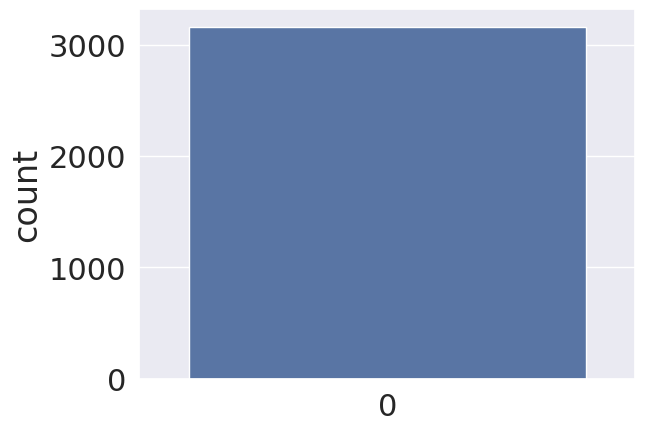

In [ ]:
import seaborn as sn
sn.countplot(y)

In [ ]:
y.value_counts()

0    2050
1     787
2     325
Name: ESI.Posterior., dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
scaler = StandardScaler()
# To scale data
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
X_test.shape

(633, 45)

In [ ]:
y_test.shape

(633,)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
# Train the individual models
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(x_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

ann_model = MLPClassifier(hidden_layer_sizes=(64, 128, 256), activation='relu')
ann_model.fit(x_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train, y_train)

# Make predictions using the individual models
svm_preds = svm_model.predict(x_val)
dt_preds = dt_model.predict(x_val)
ann_preds = ann_model.predict(x_val)
rf_preds = rf_model.predict(x_val)
# Combine the predictions using majority voting
ensemble_preds = np.array([])
for i in range(len(x_val)):
    predictions = [svm_preds[i], dt_preds[i], ann_preds[i], rf_preds[i]]
    ensemble_preds = np.append(ensemble_preds, max(set(predictions), key=predictions.count))

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_val, ensemble_preds)
print('Ensemble Accuracy(maximum): ', ensemble_accuracy)
# Combine the predictions using average
ensemble_preds = (svm_preds + dt_preds + ann_preds + rf_preds) / 4
ensemble_preds = np.round(ensemble_preds)
# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_val, ensemble_preds)
print('Ensemble Accuracy(average): ', ensemble_accuracy)

Ensemble Accuracy(maximum):  0.9968404423380727
Ensemble Accuracy(average):  0.9968404423380727


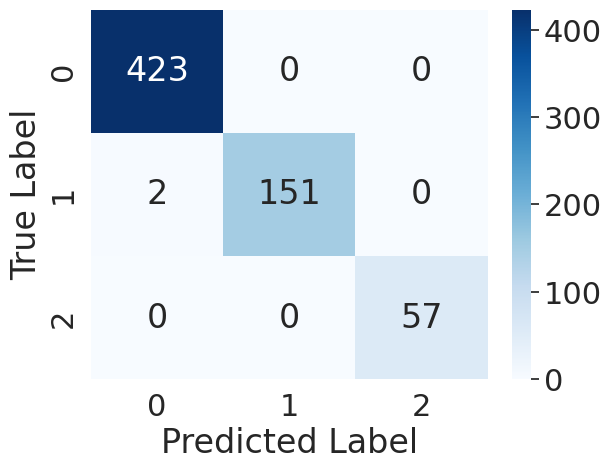

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



# Generate the confusion matrix for the average ensemble model
ensemble_conf_matrix = confusion_matrix(y_val, ensemble_preds)

# Plot the confusion matrix using seaborn library
#plt.figure(figsize = (12,10))
sns.set(font_scale=2)
sns.heatmap(ensemble_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, ensemble_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       423
           1       1.00      0.99      0.99       153
           2       1.00      1.00      1.00        57

    accuracy                           1.00       633
   macro avg       1.00      1.00      1.00       633
weighted avg       1.00      1.00      1.00       633

